This Notebook is created to analyse given Plume data.
-

prop_20160611_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160611_micro_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20150606_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20150609_c_mask_100c_mark_200_cf2_mf1.pkl

slim_prop_20160830_c_mask_100c_mark_200_cf2_mf1.pkl


prop_20150627_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160518_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160530_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160619_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160625_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160719_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160818_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160819_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20160830_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170509_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170605_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170627_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170704_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170716_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170719_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20170721_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180522_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180606_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180705_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180709_c_mask_100c_mark_200_cf2_mf1.pkl
prop_20180710_c_mask_100c_mark_200_cf2_mf1.pkl

In [1]:
import numpy as np
from importlib import reload
import pandas as pd
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from random import random
import matplotlib
import sys

In [2]:
plumes_data = './data/slim_prop_20160830_c_mask_100c_mark_200_cf2_mf1.pkl'
prop_plumes = pd.read_pickle(plumes_data)

prop_plumes.columns

Index(['x', 'y', 'sq Area', 'time', 'V_h'], dtype='object')

----------------------------------------------------
Let's have a look at the variation of alpha over time
-
plot_plumes_slope() uses log binning

plot_plume_alpha() uses logarithmic bins and a cumulative distribution function for slope calculation
-

nan_pos: [  0   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  68  69  72  75
  80 150]
nan_pos: [  0   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  77  78  80 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150]
nan_pos: [  0   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62 

/home/till/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


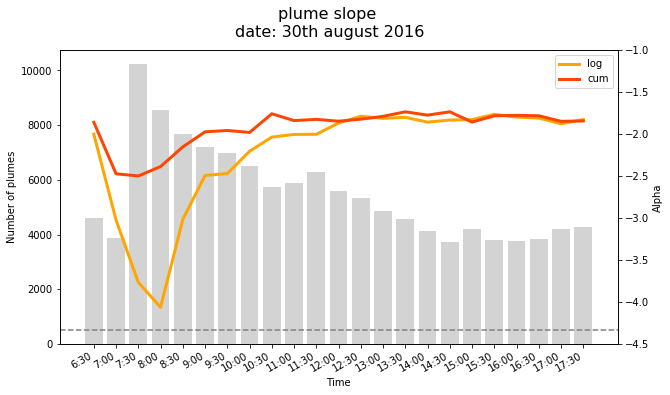

In [5]:
import numpy as np
from importlib import reload
import pandas as pd
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)
import matplotlib.pyplot as plt

bin_n       = 150
bin_min     = 10
bin_max     = 750
min_pixel   = 4
n_plume_min = 500

plumes_time_area = prop_plumes[['time','sq Area']]
#del(prop_plumes)
plumes_time_area = plumes_time_area.loc[plumes_time_area['sq Area']<25600]

time, n_plumes, slope_lin, slope_log, slope_com = plot_plume_alpha(plumes_time_area,bin_n,bin_min,bin_max,min_pixel,n_plume_min)
time_labels = ['6:30','7:00','7:30','8:00','8:30','9:00','9:30','10:00','10:30','11:00','11:30','12:00','12:30','13:00','13:30','14:00','14:30','15:00','15:30','16:00','16:30','17:00','17:30']
axes = plt
axes.figure(figsize=(10,6))
axes.bar(time_labels, n_plumes, color='lightgrey')
axes.xlabel('Time')
axes.ylabel('Number of plumes')
axes.axhline(y=n_plume_min, color='grey', linestyle='--')

axes2 = axes.twinx()

axes2.set_ylabel('Alpha')
#axes2.plot(time, slope_lin, linewidth=3, color='gold', label='lin')
axes2.plot(time_labels, slope_log, linewidth=3, color='orange', label='log')
axes2.plot(time_labels, slope_com, linewidth=3, color='orangered', label='cum')
plt.ylim(-4.5,-1)

plt.legend()
plt.suptitle('plume slope \ndate: 30th august 2016', fontsize=16)
plt.gcf().autofmt_xdate()
plt.savefig('log_com_slopes_plumes_20160830.pdf',bbox_inches='tight')

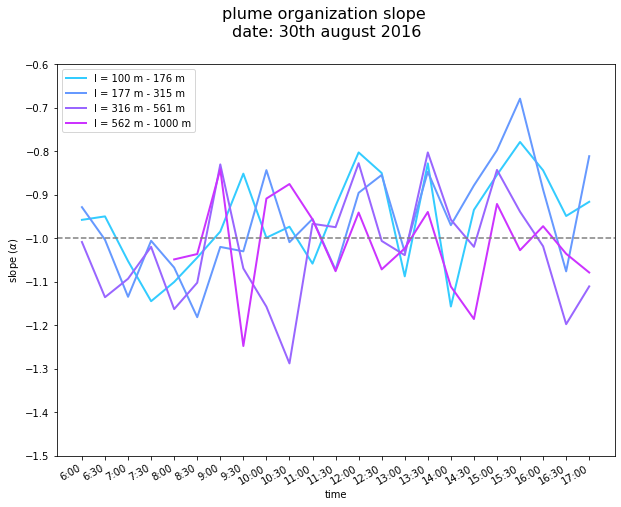

CPU times: user 10.5 s, sys: 119 ms, total: 10.6 s
Wall time: 10.4 s


In [24]:
%%time
import numpy as np
from importlib import reload
import organization
from organization import *
reload(organization)
import slopes_and_binning
from slopes_and_binning import *
reload(slopes_and_binning)
import cloud_and_plumes_slopes
from cloud_and_plumes_slopes import *
reload(cloud_and_plumes_slopes)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

subdomains = [2,4,8,16,32]  #number of subdomains in both x and y-axis
n_bins = 4                  #number of bins which devide the whole plume size range
log_binning = True
inbetween_subs = True

domain_size = 1024

percentile = False           #if set to False min_size and max_size will be used as boundaries for the size distribution
lower_percentile = 5
upper_percentile = 95
min_size = 100
max_size = 1001.5

prop_plumes = prop_plumes[['time','sq Area','x','y']]
prop_plumes = prop_plumes.loc[prop_plumes['sq Area']<25600]

plume_time  = np.unique(prop_plumes['time'])
time_vector = range(len(plume_time))        #time can be either the whole timespan or specific timesteps (time = [0,1,8,9])

center_x = []
center_y = []
size = []
for timestep in range(len(plume_time)):
    center_x.append(prop_plumes['x'].loc[prop_plumes['time']==plume_time[timestep]])
    center_y.append(prop_plumes['y'].loc[prop_plumes['time']==plume_time[timestep]])
    size.append(prop_plumes['sq Area'].loc[prop_plumes['time']==plume_time[timestep]])

if percentile:
    min_size = np.percentile((prop_plumes['sq Area']), lower_percentile)
    print(lower_percentile,'th percentile -> ',np.round(min_size,1),'m')
    max_size = np.percentile((prop_plumes['sq Area']), upper_percentile)
    print(upper_percentile,'th percentile -> ',np.round(max_size,1),'m')
    
f = variability(center_x, center_y, size, time_vector, domain_size, subdomains, n_bins, min_size, max_size, log_binning=True, inbetween_subs=True, show_subs=False)
plt.suptitle('plume organization slope \ndate: 30th august 2016', fontsize=16)
plt.savefig('organization_plumes_20160830.pdf',bbox_inches='tight')
plt.show()

In [125]:
#xxx = np.asarray(xxx)
thetime = np.unique(prop_plumes['time'])
thetime[12]

numpy.datetime64('2020-01-01T12:30:00.000000000')